In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Training data normalization

In [8]:
env = 'inverteddoublependulum'
prefix=env+'/'
raw_data = np.load(prefix+'dynamics.npy', allow_pickle=True)
print(raw_data.shape)

(92064, 2)


In [9]:
# mean and std before normalization
param_data = np.vstack(np.vstack(raw_data[:, 0])[:, -1])
print(param_data.shape)
norm_factor = []
m_vec = []
std_vec = []
for dim in range(param_data.shape[1]):
    m=np.mean(param_data.T[dim])
    std=np.std(param_data.T[dim])
    m_vec.append(m)
    std_vec.append(std)
m_vec = np.array(m_vec)
std_vec = np.array(std_vec)
norm_factor=[m_vec, std_vec]
np.save(prefix+'norm_factor.npy', norm_factor)
print(norm_factor)

(92064, 5)
[array([0.16154307, 9.740149  , 0.6109008 , 0.60664666, 1.0140377 ],
      dtype=float32), array([0.08051212, 0.720381  , 0.17322679, 0.17211911, 0.28749457],
      dtype=float32)]


In [10]:
# normalize the data with calculated mean and std
processed_data = raw_data.copy()
for i in range(processed_data.shape[0]):
    if i % 5000 ==0:
        print(i)
    processed_data[i][0][-1] = ((processed_data[i][0][-1] - m_vec)/std_vec).tolist()
print(processed_data.shape)
np.save(prefix+'norm_dynamics.npy', processed_data)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
(92064, 2)


In [11]:
# mean and std after normalization
m_vec = []
std_vec = []
param_data_ = np.vstack(np.vstack(processed_data[:, 0])[:, -1])
print(param_data_.shape)
for dim in range(param_data_.shape[1]):
    m=np.mean(param_data_.T[dim])
    std=np.std(param_data_.T[dim])
    m_vec.append(m)
    std_vec.append(std)
    print(m, std)

(92064, 5)
2.454712887226034e-08 1.000000032542509
2.469034677938812e-07 0.9999999705924842
3.315874034978144e-08 1.0000000386893013
1.8812940097148562e-07 1.0000000505682511
-3.997461339737444e-09 1.0000000543790397


In [12]:
f = np.load(prefix+'norm_factor.npy')
print(f)

[[0.16154307 9.740149   0.6109008  0.60664666 1.0140377 ]
 [0.08051212 0.720381   0.17322679 0.17211911 0.28749457]]


## Test data analysis

In [31]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)
    
def remove_abnormal(data):
    data_=[]
    for i in range(data.shape[0]):
        s = np.sum(data[i])
        if np.isnan(s) or s>1e10:
            print(i)
        else:
            data_.append(data[i])
    return np.array(data_)

In [41]:
Type = ['EncoderDynamicsNetwork', 'EncoderDecoderDynamicsNetwork', 'VAEDynamicsNetwork'][0]
test_data = np.load('{}_dynamics_test.npy'.format(Type))
test_data.shape

(50, 2, 300)

In [42]:
diff=test_data[:, 0]
relative_diff=test_data[:, 1]
print(diff.shape)

(50, 300)


0
1
2
3
4
5
6
7
9
10
12
13
14
15
16
18
19
20
22
23
24
25
26
28
30
32
34
35
37
39
41
42
43
45
46
47
48
49


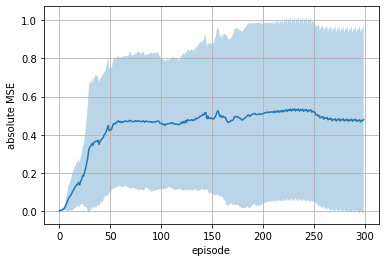

In [43]:
x=np.arange(diff_.shape[1])
diff_ = remove_abnormal(diff)
plt.xlabel('episode')
plt.ylabel('absolute MSE')
plt.grid()
plot_with_fill(x, diff_, label='absolute error')

0
1
2
3
4
5
6
7
9
10
12
13
14
15
16
18
19
20
22
23
24
25
26
28
30
32
34
35
37
39
41
42
43
45
46
47
48
49


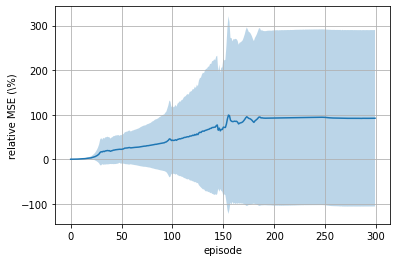

In [44]:
relative_diff_ = remove_abnormal(relative_diff)
plt.xlabel('episode')
plt.ylabel('relative MSE (\%)')
plt.grid()
plot_with_fill(x, relative_diff_, label='relative error')

In [2]:
a=[2,34,3.53]
b=[2,34,3.5]
if a==b:
    print(True)